&copy; Bedzyk Research Group 2020, Northwestern University

<div class="alert alert-block alert-warning">
To start this project, in the top menu bar click $\text{Cell}\to \text{ Run All}$. Then, scroll back up to the top of this document.
</div>

In [180]:
#http://blog.nextgenetics.net/?e=102
from IPython.display import HTML
HTML('''<script>
code_show_2=true; 
function code_toggle_2() {
 if (code_show_2){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show_2 = !code_show_2
} 
$( document ).ready(code_toggle_2);
</script>
The raw code for this Jupyter Notebook is by default hidden for easier reading.
To toggle on/off the raw code for this entire notebook, click <a href="javascript:code_toggle_2()">here</a>.''')


<div class="alert alert-block alert-warning">
Raw code is hidden by default for the entire notebook. You can toggle on/off the raw code for this entire notebook by clicking the button above. More importantly, raw code for individual cells can be shown/hidden by using the message/button: <img src="images/show_hide_button.png"/> Hiding the code is mainly for visual purposes and may be useful if you would like a hard copy (i.e. pdf) of this document. However, there are also instances where you will need to show the code cell so you can input different parameters. This button will show up repeatedly throughout this document. Try showing and hiding the code in the cell block below as an example.
</div>

In [181]:
# importing the necessary libraries and packages for XRR.ipynb
import ipywidgets as widgets
from ipywidgets import Label, Layout
from IPython.display import display, Markdown, clear_output
from IPython.display import display
from IPython.display import Image
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy import integrate
from IPython.display import IFrame



# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
# https://gist.github.com/Zsailer/5d1f4e357c78409dd9a5a4e5c61be552

# This tag allows the supression of input cells that have to deal with formatting and code.
# You are viewing the "code" version of the "click here" button you just pressed
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
(To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.)''')
display(tag)

# Jupyter Notebook Introduction

Jupyter Notebook is a an open source web application/user interface that allows users to create and share documents containing code, equations, visualizations, and narrative text by using a combination of different programming languages. In this Jupyter Notebook (*HRXRD.ipynb*), we will be using **Python 3** for all analysis purposes (in the top right corner of this page, you will see the tag Python 3 which tells you the programming language of the notebook). The most important concept of Jupyter Notebooks is the concept of a **cell block**. Clicking on a block of text or code will highlight (in blue in this case) the current cell block you are viewing. Click on this block of text. In the menu bar at the top of this document, you will see a drop down menu: <img src="images/markdown_dropdown.png"/> 

**Markdown** is referring the type of this cell block. Markdown is a text formatting language supported in Jupyter Notebook. By *double clicking* on the text you are reading right now, you will see the Markdown version of the cell block. You will see the other types of supported cell blocks by clicking the drop down menu. For example, "Code" is another type of cell block you will be seeing in this document and they all contain snippets of Python 3 code. 

To run code of a particular cell block, click into the cell and either click the run button above: 

<img src="images/run_jupyter.png"/>

or click "Shift+Enter" on your keyboard. Running a cell will also allow you to exit the "code view" version of a Markdown cell block. 

That is all you will need to know for this laboratory exercise. Have fun and we welcome any positive/negative feedback!

>**NOTE:** *Do not worry if you do not know Python or Markdown as there is no coding necessary for completing this project. In fact, most code cells can be left hidden for the entire exercise and you never even have to see code!*

# Re-accessing X-ray Lab Server

<div class="alert alert-block alert-danger">
Before beginning, make sure to locate your netID folder. This is where you will be saving all of your data. You should have already created a folder during the X-ray Reflectivity Exercise (Lab 1).
<br/><br/>
On the lab computer, the location of the server is:
<br/><br/>
$\text{This PC} \to \text{mrc_xrayfac (\\\\resfiles.northwestern.edu)(Z:)} \to \text{netID folders} \to \text{[your_net_ID]}$

    
You may also wish to mount the server onto your computer. Click the following link and follow the appropriate steps if you would like to do so:
>https://kb.northwestern.edu/page.php?id=70525

For further clarification, see *XRR.ipynb* in this same directory.

 
</div>

# *Before You Begin...*
Please verify what SmartLab model you are using. In the cell block below, please click on the machine and software that corresponds to your SmartLab. You will see a screen shot of the software for the machine you click on.

After selecting, navigate into the cell block below the screen shot. Click $\text{Cell}\to \text{ Run All Below}$ to update the instructions tailored to your machine.

Most of the lab will be performed within the *Pro/Manual Control* window of the Smartlab softwares (circled in red in the screenshots).

In [182]:
display(tag)

machine_toggle_1 = widgets.ToggleButton(
    value=False,
)

machine_button_1 = widgets.Button(
    description='Smartlab Gen 1, Guidance',
    disabled=False,
    button_style='Warning', # 'success', 'info', 'warning', 'danger' or ''
    layout={'width': '300px'}
)

machine_toggle_2 = widgets.ToggleButton(
    value=False,
)

machine_button_2 = widgets.Button(
    description='Smartlab Gen 2, Studio II',
    disabled=False,
    button_style='Warning', # 'success', 'info', 'warning', 'danger' or ''
    layout={'width': '300px'}
)

#defining what the button will do on clicking: output a screenshot of each software
def on_button_clicked_machine_1(b):
    clear_output()
    display(machines)
    machine_toggle_1.value = True
    machine_toggle_2.value = False
    display(Image(filename='images/guidance_3.png'))   
def on_button_clicked_machine_2(b):
    clear_output()
    display(machines)
    machine_toggle_1.value = False
    machine_toggle_2.value = True
    display(Image(filename='images/studio_II_3.png'))
    

machine_button_1.on_click(on_button_clicked_machine_1)
machine_button_2.on_click(on_button_clicked_machine_2)
        
#displaying the buttons for the two types of machines
machine_button_layout = widgets.Layout(align_items='center')
machines = widgets.VBox(children=[machine_button_1,machine_button_2],layout=machine_button_layout)
display(machines)

# Click $\text{Cell}\to \text{Run  All  Below}$ when inside of this cell after selecting your instrument.

### <br/><br/>
<div align="center">
<font size="18" color="#990000"><b> Thin Film <br/> <br/> High Resolution X-ray Diffraction <br/><br/> (HRXRD) </b></font>
</div>

# Overview of the technique

In the X-ray reflectivity (XRR) measurement of Lab 1 you scanned along the low-Q end of the specular rod in reciprocal space to determine the film thickness, density and interface roughnesses. Here in Lab 2 you will continue to scan along this same specular rod but at a higher Q range that covers the Bragg peaks from the substrate and film. These are for reciprocal space vectors <strong>G</strong><sub>hkl</sub> that are nominally perpendicular to the surface. Because these features are narrower in reciprocal space you need to measure with higher Q resolution.(i.e., Smaller wavelength spread and smaller angular divergence of the incident beam.)  To achieve this we inserted a Ge(220) 2-bounce channel-cut monochromator crystal on the incident beam arm in the position previously occupied by the soller slit. See diagram below. This monochromator only passes Cu K$\alpha_1$ radiation (and not K$\alpha_2$). You will use this so-called High-Resolution X-ray Diffraction (HRXRD) method to investigate the out-of-plane registry of the epitaxial film lattice with respect to the single crystal substrate lattice. The cost of higher resolution is lower intensity for the incident beam.
<div align="center">
<FIGURE> 
   <img src="images/Fig1_HXRD_SmartLab_v2.png" />
   <FIGCAPTION> <b>Fig. 1:</b> <i> SmartLab Diffractometer with Ge (220) 2-bounce monochromator option inserted to increase the resolution. 
</FIGURE>
</div>

Your substrate is a 10 x 10 x 0.5 mm c-plane sapphire $\alpha$-Al$_2$O$_3$(001) single crystal. The PLD grown film will be  $\alpha$-Fe$_2$O$_3$ or Pt with a thickness between 10 and 100 nm.  HRXRD will allow you to determine the  film's crystallinity (single crystal or textured polycrystalline), out-of-plane lattice constant and single crystal domain size. More specifically for your case, HRXRD  shows whether or not the hexagonal basal planes of the film are parallel to the basal $c$-planes of the substrate.  Prior to starting the HRXRD experiment, you should have used CrystalMaker and SingleCrystal to study the crystal structures of the substrate and film and determined what you expect for the alignment of the film's crystallographic hkl direction with the substrate crystal c-axis, and what are the d-spacings ( and Bragg angles) for the first allowed reflections along surface normal direction for both the substrate and film.  

In this lab you will perform 2 types of scans:

1. $2\theta\omega$ scan (also referred to as a radial scan or longitudinal scan in reciprocal space where you are scanning along Q<sub>⊥</sub> direction): This is a <strong>coupled scan</strong>, with the incident beam arm and detector arm rotating with equal steps in opposite directions.(For a positive 2° step in 2$\theta$ the incident arm rotates   1° clockwise and the detector arm rotates  1° counterclockwise.) Remember that the SmartLab keeps the sample fixed in a horizontal position during these scans. The diffraction peak positions will obey Bragg's Law. The instrument resolution of this scan can be determined from the width of the substrate Bragg peak. The width of the film's Bragg peak is used to determine the single crystal domain size of the film. Compare this to what you found for the film thickness in your Lab 1 XRR measurement.


2. $\omega$ scan (also referred to as a transverse scan in reciprocal space): The incident beam arm and detector arm rotate with equal steps in the same direction with 2$\theta$  <strong>fixed</strong> at the Bragg condition. This is also know as a <strong>Rocking Curve</strong> (RC) scan. The $\Delta$$\omega$ instrument resolution of this scan is determined from the width of the substrate Bragg peak RC. The film's RC width has contributions from the mosaic spread and in-plane domain size. A mosaic crystal or a film is built up by many cristallites (grains) with different tilt angles (δΩ). This is shown in **Fig. 2**. According to δΩ the crystallites can group in ensembles for which Bragg equation will be fulfilled. The rocking curve measurement is commonly used as a figure of merit to evaluate the mosaicity of a thin epitaxial film. The smaller the width of the peak, the better the individual crystallites are aligned and the larger their size.


<div align="center">
<FIGURE> 
   <img src="images/hrxrd_mosaic.png" />
    <br/><br/>
   <FIGCAPTION> <b>Fig. 2: </b> <i> X-ray diffraction for (a) ideal single crystal and (b) a mosaic crystal or film</i></FIGCAPTION>
    
</FIGURE>
</div>

## What Do We Expect?

At what $2\theta$ value do you expect to find the find the substrate and film diffraction peaks ($\alpha$-Fe$_2$O$_3$ or Pt and c-plane sapphire $\alpha$-Al$_2$O$_3$(001))? You should be able to calculate this based on class discussions or preliminary work done with CrystalMaker. Input those values in the table below (show the cell's raw code input below and enter your values). We will compare these expected values to what you measure in this lab exercise.

In [183]:
display(tag)
film = "Film"
film_2th = "N/A"
sub_2th = "N/A"
substrate = "Substrate"
film_measured = "N/A"
sub_measured = "N/A"

In [184]:
Markdown("| Material | 2$\\theta$($\circ$) (Theoretical) |2$\\theta$($\circ$) (Measured)  | \
         \n|------|------|------|\
         \n|   {} | {}|{}|\
         \n|   {} | {}|{}|".format(film,film_2th,film_measured,substrate,sub_2th,sub_measured))

| Material | 2$\theta$($\circ$) (Theoretical) |2$\theta$($\circ$) (Measured)  |          
|------|------|------|         
|   Film | N/A|N/A|         
|   Substrate | N/A|N/A|

## 1. Working with SmartLab

Having completed the XRR lab, you should feel more comfortable navigating the SmartLab Guidance or Studio II softwares.

### Follow the instructions and put a check mark in each step as you advance. These steps are to set up the Smartlab software and initial conditions for the experiment.

The following experiment will be performed in the *Pro Control* window of Smartlab Studio 2 software.

In [185]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code


# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list_getting_started = ['Open XG Control (XG Control is located in the $\\text{Control}$ tab on SmartLab Guidance).',
            'Turn on the X-Ray tube and wait',
            'Set the voltage to $45$ kV. Click on $\\text{SET}$ and wait',
            'After the voltage has been set, set the current to $160$ mA. Click on $\\text{SET}$ and wait',
            'Close XG Control and open Pro/Manual Control in the Home Tab',
            'Look at the H/W Status Window in the left part of the screen. Make sure the following motors are set to zero in the H/W Status Tab: 2$\\theta$, $\omega$, 2$\\theta\chi$, $\chi$, $\phi$, R$_x$, R$_y$. If not, open the tab for the specific motor in Pro Control, type zero in the Move Tab and click on Move. In addition, double-check that the voltage is $45$ kV and current is $160$ mA.']
checkbox_array_getting_started = []
for step in step_list_getting_started:
    step_index = str(step_list_getting_started.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_getting_started.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb1 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_getting_started:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_getting_started.index(checkbox)+1))
            pb1.button_style='danger'
    if steps_completed == len(checkbox_array_getting_started):
        print("You finished Getting Started with Smartlab. Please, continue to Sample Alignment. Nice job!")
        pb1.button_style='success'
        
pb1.on_click(on_button_clicked)
display(pb1)

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Open XG Cont…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Turn on the …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Set the volt…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='After the vo…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Close XG Con…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Look at the …

Button(button_style='info', description='Finish!', style=ButtonStyle())

## 2. Sample Alignment (Thin Film)

The steps below should look familiar to you; they are the same steps you performed when aligning your sample for XRR. The difference lies in the set-up of the diffractometer (i.e. the Ge (220) monochromator and removal of incident soller slits). In addition, we will insert a $5$mm length limiting slit. Check with your lab supervisor that your equipment is set up correctly.

<div class="alert alert-block alert-warning">
    If you ever feel lost when perfroming scans, refer back to <b>Fig. 1</b> to remind yourself of the geometry of each scan type. And, of course, feel free to ask your lab supervisor any questions. They will prove to be much more helpful than any set of instructions.
</div>

##### Prior to  sample alignment, the optics, sample goniometer, and detector slits have been prealigned by the XRD facility staff.  You can eventually learn how to do this alignment on your own with a set of automated procedures that are part of the SmartLab software control system. 

### _Important Parameters_

The cell below is place where you can record various important parameters that will come up throughout the experiment. 

Whenever you update the values, make sure to run the cell by clicking into the cell and either clicking the run button above: <img src="images/run_jupyter.png"/>
or by clicking "Shift+Enter" on your keyboard.

To test if you executed the cell, the parameters and their values will all be listed in the drop down menu below where you can click "Print Variable" to see its value.

Show the cell block's raw code by clicking the toggle button below and then input your parameter values.|

In [186]:
# Here is a list of important parameters for you to fill out
display(tag)

th_true_zero = 0.02
straight_through_beam = 5e8 #cps
film_bragg_FWHM = 1
film_bragg_position = 1 
film_bragg_intensity = 1
film_rocking_FWHM = 1
film_rocking_position = 1
film_rocking_intensity = 1
al2O3_bragg_FWHM = 1
al2O3_bragg_position = 1
al2O3_bragg_intensity = 1
al2O3_rocking_FWHM = 1
al2O3_rocking_position = 1
al2O3_rocking_intensity = 1

In [187]:
# selecting variables for button
button_variables = ['th_true_zero','straight_through_beam',
                    'film_bragg_FWHM','film_bragg_position','film_bragg_intensity',
                    'film_rocking_FWHM','film_rocking_position','film_rocking_intensity',
                    'al2O3_bragg_FWHM','al2O3_bragg_position','al2O3_bragg_intensity',
                    'al2O3_rocking_FWHM','al2O3_rocking_position','al2O3_rocking_intensity']
funcs = []
for i in button_variables:
    funcs.append(i)
 
# creating menu with them   
button_vars = widgets.Dropdown(
    options=funcs)
# button, output, function and linkage
butt = widgets.Button(description='Print Variable')
outt = widgets.Output()
def on_butt_clicked(b):
    with outt:
        clear_output()
        #print(type(globals()[button_vars.value]))
        print(globals()[button_vars.value])
        
butt.on_click(on_butt_clicked)
# display
widgets.VBox([button_vars,butt,outt])

### Follow the instructions and put a check mark in each step as you advance. These steps are to align the thin film sample in preparation for measurements.

The following experiment will be performed in the *Pro Control* window of Smartlab Studio 2 software.

In [188]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code

alignment_guidance = ['Make sure the sample is centered on the stage (circular plate). If not, ask the XRD facility staff to reposition the sample.',
            'In Manual Control, select $Z$ from the Axis list. Set up the slits to the following: Incident Slit $=0.5$ mm, Receiving Slit $1=0.7$ mm, Receiving Slit $2=0.7$ mm. Make sure to click on set to update the values in the H/W status window. These slit values were determined specifically for your lab experiment. The reduced intensity caused by the monochromator will be somewhat mitigated by larger slits (compared to the XRR experiment). Ask your supervisor for more information.',
            'Make sure Automatic Attenuator is checked in the Scan Tab.',
            'Perform an Absolute $Z$ scan by entering the following values [range = $-3$ to $0$ mm, step $= 0.02$ mm/step, speed$=4$ mm/min] and clicking on Scan to start. This is a coarse $Z$ scan done to locate our sample. <b><i>NOTE:</b> The units for the scan speed will actually be mm/min even though the template shows deg/min.',
            'The scan should show a flat line, followed by a drop to zero once the beam crosses the sample. You can read off the $Z$ postion values by moving the cross hairs in the Display Area. Move the $Z$ position to the halfway point of this "drop" by entering the $Z$ value you read off in the Move box and clicking Move (i.e. when the incoming beam reaches half its intensity).',
            'Select R$_y$ from the Axis List. Check the option Move to Peak.',
            'Perform a R$_y$ scan [relative -$1$ to $1$, step$=0.01$ deg/step, speed$=4$ deg/min]. Again, make sure Automatic Attenuator is checked. The located peak will be labeled with a red X.',
            'Now perform another $Z$ scan [Relative -$0.25$ to $0.25$, step$=0.002$ mm/step, speed$=2$ mm/min]. Make sure the option Relative is selected. Notice, your most recent scan will be colored RED. Again, move to the same "halfway" point',
            'Save $Z$ scan by clicking on the save icon ("floppy disk"). Save in your netID directory in the following format: "z_stb.ras".',
            'Record the Straight Through Beam Intensity (STB) in the $\\textbf{Important Parameters}$ section above. To find the STB, in the top of the screen select the chart tab. Click on Coordinate and place the cursor at the maximum value of your scan. It should be around ($5\\times 10^{7}$ cps)']


# To do list containing all the steps for XRR on SmartLab Gen 2
alignment_studio = ['Make sure the sample is centered on the stage (circular plate). If not, ask the XRD facility staff to reposition the sample.',
            'In Pro Control, select $Z$ from the Axis list. Set up the slits to the following: IS$=0.5$ mm, RS$_1=0.7$ mm, RS$_2=0.7$ mm. Make sure to click on set to update the values in the H/W status window. These slit values were determined specifically for your lab experiment. The reduced intensity caused by the monochromator will be somewhat mitigated by larger slits (compared to the XRR experiment). Ask your supervisor for more information.',
            'Make sure Automatic Attenuator is checked in the Scan Tab.',
            'Perform an Absolute $Z$ scan by entering the following values [range = $-3$ to $0$ mm, step $= 0.02$ mm/step, speed$=4$ mm/min] and clicking on Scan to start. This is a coarse $Z$ scan done to locate our sample.',
            'The scan should show a flat line, followed by a drop to zero once the beam crosses the sample. You can read off the $Z$ postion values by moving the cross hairs in the Display Area. Move the $Z$ position to the halfway point of this "drop" by entering the $Z$ value you read off in the Move box and clicking Move (i.e. when the incoming beam reaches half its intensity).',
            'Select R$_y$ from the Axis List. Check the option Move to Peak in the Post scan Tab. There, click on the option $\\text{Set...}$ and select Full Width at Half Maximum Center (or Maxium Intensity) for Peak Search Method. Click $\\text{Ok}$.',
            'Perform a R$_y$ scan [relative -$1$ to $1$, step$=0.01$ deg/step, speed$=4$ deg/min]. Again, make sure Automatic Attenuator is checked. The located peak will be shown with a RED point. We will continuously use this SmartLab feature throughout the lab.',
            'Select the $Z$ tab and check the option Move to Peak in the Post scan Tab. There, click on the option $\\text{Set...}$ and select Edge Search for peak search method. Click $\\text{Ok}$.',
            'Make sure Automatic Attenuator is checked in the Scan Tab.',
            'Perform another $Z$ scan [Relative -$0.25$ to $0.25$, step$=0.002$ mm/step, speed$=2$ mm/min]. Make sure the option Relative is selected. Click on Scan to start. Notice, your most recent scan will be colored RED.',  
            'Save $Z$ scan. Right click on your last $Z$ scan in Data Browser. Select $\\text{Export data}\\to\\text{to File}$ and save in your netID directory in the following format: "z_stb.ras". <i><b>NOTE: </b> Make sure to save the scan in the "ras" format, NOT "rasx". </i>',
            'Record the Straight Through Beam Intensity (STB) in the $\\textbf{Important Parameters}$ section above. To find the STB, in the top of the screen select the chart tab. Click on Coordinate and place the cursor at the maximum value of your scan. It should be around ($5\\times 10^{7}$ cps)']

if (machine_toggle_1.value):
    step_list_alignment = alignment_guidance
    print("Instructions for SmartLab Guidance")
else:
    step_list_alignment = alignment_studio
    print("Instructions for SmartLab Studio II")

checkbox_array_alignment= []
for step in step_list_alignment:
    step_index = str(step_list_alignment.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_alignment.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb2 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
    
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_alignment:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_alignment.index(checkbox)+1))
            pb2.button_style='danger'
    if steps_completed == len(checkbox_array_alignment):
        print("You finished Sample Alignment. Good Job! Now we are ready to perform High Resolution X-ray Diffraction (HRXRD) on our sample.")
        pb2.button_style='success'
        
pb2.on_click(on_button_clicked)
display(pb2)

Instructions for SmartLab Studio II


GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Make sure th…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='In Pro Contr…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Make sure Au…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Perform an A…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='The scan sho…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Select R$_y$…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='Perform a R$…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Make sure Au…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>10:'), HTMLMath(value='Perform ano…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>11:'), HTMLMath(value='Save $Z$ sc…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>12:'), HTMLMath(value='Record the …

Button(button_style='info', description='Finish!', style=ButtonStyle())

## 3. Performing HRXRD

Before we perform the X-ray Diffraction experiment, we need to look a little more into the alignment of the diffractometer. 

Note down the $Z$ position of your aligned sample. We are going to move the sample out of the beam, perform a $2\theta$ scan (<b>NOT</b> $2\theta\omega$ or $\theta/ 2\theta$) to see how are beam is aligned. The located peak position will tell us our true zero for all of our future $2\theta\omega$ scans. This number, should be subtracted from all measured peak values in $2\theta\omega$ scans to acquire the true peak position value. Note the slight offset of the center of the peak from zero in the example scan below.

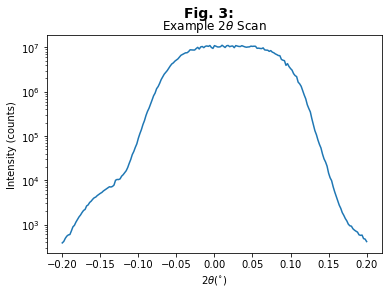

In [189]:
display(tag)
df_2theta = pd.read_table('https://raw.githubusercontent.com/josephmccourt2018/lab_jupyter_notebooks/master/example/461_test/PLD50nmFe2O3_Al2O3/HRXRD_Lab/2th_stb.ras',sep = '\s+',comment='*',names = ["2TH","Intensity", "attenuatation"],header = None)
plt.figure()
plt.suptitle('Fig. 3:', fontsize=14, fontweight='bold')
plt.title('Example $2\\theta$ Scan')
plt.plot(df_2theta[df_2theta.columns[0]],df_2theta[df_2theta.columns[1]]*df_2theta[df_2theta.columns[2]])
plt.yscale('log')
plt.xlabel("$2\\theta$($^{\circ}$)")
plt.ylabel(df_2theta.columns[1]+" (counts)")
plt.show()

To perform this scan, move the $Z$ position to $-3$ mm (to move the sample out of the way). Perform a relative $2\theta$ scan from $-0.2$ to $0.2$ with a $0.02$ step size at $0.5$ degree per minute. Note down the value of the $2\theta$ peak center position in the <b>Important Parameters</b> section above. You will need this value for your future analysis.

### Follow the instructions and put a check mark in each step as you advance. These steps are to measure the (006) diffraction peak of the film (Fe$_2$O$_3$) and to perform a rocking curve.

In [190]:
display(tag)
#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code

step_list_film_guidance = ['We will perform a survey scan over $2\\theta\omega$. Select the $2\\theta\omega$ axis in Manual Control and perform an absolute scan from 35 to 45° with step size 0.02° at speed of 2°/minute. The units are in terms of 2$\\theta$.',
                  'Save the previous scan into your netID directory in the following format: "th2th_SURVEY.ras".',
            'Select the $2\\theta\omega$ axis in Manual Control. Move to the Fe$_2$O$_3$ (006) or Pt (111) film peak. You should have seen this peak in your survey scan.',
            'Perform a  $2\\theta\omega$ scan. [Relative -1° to 1°, step = 0.01°/step, speed=1°/min]',
            'Write in the <strong>Important Parameters</strong> section above:  FWHM, position, and intensity of the  Fe$_2$O$_3$ (006) or Pt(111)  Bragg Peak.',
            'Select the $\omega$ Axis  in Manual Control. Perform a omega scan [Relative -.5° to .5°, step=0.01°/step, speed=0.5°/min].',
            'Save $\omega$ scan. Right click on your last $\omega$ scan in Data Browser. Select export, to File and save in your folder in following format: "W_Fe2O3_006.ras" or "W_Pt111.ras" This is known as the <strong>Rocking Curve</strong> of the film.',
            'Write in the <strong>Important Parameters</strong> section above:  FWHM, position, and intensity of the rocking curve of Fe$_2$O$_3$ (006).',
            'Select the $2\\theta\omega$ axis  in Manual Control.  Click on the option Absolute. Perform a long $2\\theta\omega$ scan. [Set the scan range to be 10x the FWHM of the film Bragg peak, speed=0.25°/min].  For the step size do approximately 1/10 of the FWHM of this peak (10 data points per peak is a good "rule of thumb").',
            'Perform a background $2\\theta\omega$ scan as well. Do you remember how to do this?',
            'Save the two $2\\theta\omega$ scans. "th2th_HRXRD_Ridge.ras" and "th2th_HRXRD_Ridge_BKG.ras" ']

# To do list containing all the steps for HRXRD
step_list_film_studio = ['We will perform a survey scan over $2\\theta\omega$. Select the $2\\theta\omega$ axis in Pro Control and perform an absolute scan from 35 to 45° with step size 0.02° at speed of 2°/minute. The units are in terms of 2$\\theta$.',
                  'Save the previous scan into your netID directory in the following format: "th2th_SURVEY.ras".',
            'Select the $2\\theta\omega$ axis in Pro Control. Move to the Fe$_2$O$_3$ (006) or Pt (111) film peak. You should have seen this peak in your survey scan.',
            'Perform a  $2\\theta\omega$ scan. [Relative -1° to 1°, step = 0.01°/step, speed=1°/min]',
            'Write in the <strong>Important Parameters</strong> section above:  FWHM, position, and intensity of the  Fe$_2$O$_3$ (006) or Pt(111)  Bragg Peak.',
            'Select the $\omega$ Axis  in Pro Control. Perform a omega scan [Relative -.5° to .5°, step=0.01°/step, speed=0.5°/min].',
            'Save $\omega$ scan. Right click on your last $\omega$ scan in Data Browser. Select export, to File and save in your folder in following format: "W_Fe2O3_006.ras" or "W_Pt111.ras" This is known as the <strong>Rocking Curve</strong> of the film.',
            'Write in the <strong>Important Parameters</strong> section above:  FWHM, position, and intensity of the rocking curve of Fe$_2$O$_3$ (006).',
            'Select the $2\\theta\omega$ axis  in Pro Control.  Click on the option Absolute. Perform a long $2\\theta\omega$ scan. [Set the scan range to be 10x the FWHM of the film Bragg peak, speed=0.25°/min].  For the step size do approximately 1/10 of the FWHM of this peak (10 data points per peak is a good "rule of thumb").',
            'Perform a background $2\\theta\omega$ scan as well. Do you remember how to do this?',
            'Save the two $2\\theta\omega$ scans. "th2th_HRXRD_Ridge.ras" and "th2th_HRXRD_Ridge_BKG.ras" ']

if (machine_toggle_1.value):
    step_list_film = step_list_film_guidance
    print("Instructions for SmartLab Guidance")
else:
    step_list_film = step_list_film_studio
    print("Instructions for SmartLab Studio II")

checkbox_array_film = []
for step in step_list_film:
    step_index = str(step_list_film.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_film.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb3 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_film:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_film.index(checkbox)+1))
            pb3.button_style='danger'
    if steps_completed == len(checkbox_array_film):
        print("You completed all the steps. Nice job!")
        pb3.button_style='success'
        
pb3.on_click(on_button_clicked)
display(pb3)

Instructions for SmartLab Studio II


GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='We will perf…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Save the pre…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Perform a  $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Write in the…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='Save $\\omeg…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='Write in the…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>9:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>10:'), HTMLMath(value='Perform a b…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>11:'), HTMLMath(value='Save the tw…

Button(button_style='info', description='Finish!', style=ButtonStyle())

Here is an example scan over $2\theta\omega$ that shows peaks due to the film and substrate:

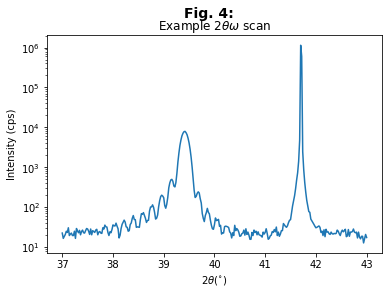

In [191]:
display(tag)
df_surv = pd.read_table('example/461_test/PLD50nmFe2O3_Al2O3/HRXRD_Lab/2thW_both_006.ras',sep = '\s+',comment='*',names = ["2TH","Intensity", "attenuatation"],header = None)
plt.figure()
plt.suptitle('Fig. 4:', fontsize=14, fontweight='bold')
plt.title('Example $2\\theta\omega$ scan')
plt.plot(df_surv[df_surv.columns[0]],df_surv[df_surv.columns[1]]*df_surv[df_surv.columns[2]]/2.4)
#2.4 is seconds per point based on scan speed and step size
plt.yscale('log')
plt.xlabel("2$\\theta$($^{\circ}$)")
plt.ylabel(df_surv.columns[1]+" (cps)")
plt.show()

#scan speed 0.5 deg/min, 0.02 step

<div class="alert alert-block alert-info">
    <strong> Think about it... </strong>
    
   As stated in the introduction, the single crystal domain size of the film can be determined by the film Bragg peak. Does this value make sense based on your Lab 1 XRR measurement for the thickness of your film?
</div>

In addition, your rocking curve for the film should look similar to the following:

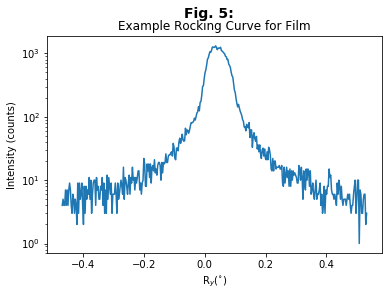

In [192]:
display(tag)
df_omega_film = pd.read_table('example/461_test/PLD50nmFe2O3_Al2O3/HRXRD_Lab/Ry_Fe2O3_006.ras',sep = '\s+',comment='*',names = ["2TH","Intensity", "attenuatation"],header = None)
plt.figure()
plt.suptitle('Fig. 5:', fontsize=14, fontweight='bold')
plt.title('Example Rocking Curve for Film')
plt.plot(df_omega_film[df_omega_film.columns[0]],df_omega_film[df_omega_film.columns[1]]*df_omega_film[df_omega_film.columns[2]])
plt.yscale('log')
plt.xlabel("R$_y$($^{\circ}$)")
plt.ylabel(df_omega_film.columns[1]+" (counts)")
plt.show()

<div class="alert alert-block alert-info">
    <strong> Think about it... </strong>
    
   Note that the $x$-axis in the example rocking curve is labelled R$_y$. However, you performed an $\omega$ scan so your $x$-axis would be $\omega$. Explain this discrepancy based on the geometry of the diffractometer.
</div>

### Follow the instructions and put a check mark in each step as you advance. These steps are to measure the (006) diffraction peak of the substrate (Al$_2$O$_3$) and to perform a rocking curve.

In [193]:
display(tag)
#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code

step_list_sub_guidance = ['Select the $2\\theta\omega$ axis  in Manual Control. Move to the substrate peak you should have seen in your survey scan.',
            'Select the $\omega$ axis in Manual Control. Check the option Move to Peak. Make sure Automatic Attenuator is on.',
            'Do an $\omega$ scan [Relative -.10 to .10, step=0.0006 deg/step, speed=.6 deg/min].',
            'Select the R$_x$ axis in Manual Control.  Make sure Automatic Attenuator is on.',
            'Do an R$_x$ scan [Relative -1 to 1, step=0.05 deg/step, speed=4 deg/min]. Make sure Move to Peak is checked off. Here, you are optimizing the intensity by rotating the sample in an axis $90^{\circ}$ off of the R$_y$ axis. We will now perform another $\omega$ scan to see the effects of aligning R$_x$.',
            'Repeat $\omega$ scan [Relative -.05 to .05, step=0.0006 deg/step, speed=.1 deg/min].',
            'Save the $\omega$ scan in your folder in following format: "W_Al2O3_006.ras" This is known as the <strong>Rocking Curve</strong> of the substrate.',
            'Write in the <strong>Important Parameters</strong> section above:  FWHM, position, and intensity of the rocking curve of Al$_2$O$_3$ (006). The FWHM is the resolution of the equipment in the $\omega$ direction. You can find this information in the Smartlab software Data Browser.',
            'Select the $2\\theta\omega$ axis. Perform a $2\\theta\omega$ scan [Relative -.10 to .10, step=0.0008 deg/step, speed=0.4 deg/min].',
            'Save $2\\theta\omega$ scan in your folder in following format: "2TW_Al2O3_006.ras"',
            'Write in the <strong>Important Parameters</strong>  section above:  FWHM, position, and intensity of the Al$_2$O$_3$ (006) Bragg Peak. The FWHM is the resolution of the equipment in the $2\\theta\omega$ direction.']


# To do list containing all the steps for HRXRD
step_list_sub_studio = ['Select the $2\\theta\omega$ axis  in Pro Control. Move to the substrate peak you should have seen in your survey scan.',
            'Select the $\omega$ axis in Pro Control. Check the option Move to Peak and in Set, select FWHM Center for Peak Search Method. Make sure Automatic Attenuator is on.',
            'Do an $\omega$ scan [Relative -.10 to .10, step=0.0006 deg/step, speed=.6 deg/min].',
            'Select the R$_x$ axis in Pro Control.  Make sure Automatic Attenuator is on.',
            'Do an R$_x$ scan [Relative -1 to 1, step=0.05 deg/step, speed=4 deg/min]. Check that Move to Peak is set correctly. Here, you are optimizing the intensity by rotating the sample in an axis $90^{\circ}$ off of the R$_y$ axis. We will now perform another $\omega$ scan to see the effects of aligning R$_x$.',
            'Repeat $\omega$ scan [Relative -.05 to .05, step=0.0006 deg/step, speed=.1 deg/min].',
            'Save $\omega$ scan. Right click on your last $\omega$ scan in Data Browser. Select export, to File and save in your folder in following format: "W_Al2O3_006.ras" This is known as the <strong>Rocking Curve</strong> of the substrate.',
            'Write in the <strong>Important Parameters</strong> section above:  FWHM, position, and intensity of the rocking curve of Al$_2$O$_3$ (006). The FWHM is the resolution of the equipment in the $\omega$ direction. You can find this information in the Smartlab software Data Browser.',
            'Select the $2\\theta\omega$ axis. Perform a $2\\theta\omega$ scan [Relative -.10 to .10, step=0.0008 deg/step, speed=0.4 deg/min].',
            'Save $2\\theta\omega$ scan. Right click on your last $2\\theta\omega$ scan in Data Browser. Select export, to File and save in your folder in following format: "2TW_Al2O3_006.ras"',
            'Write in the <strong>Important Parameters</strong>  section above:  FWHM, position, and intensity of the Al$_2$O$_3$ (006) Bragg Peak. The FWHM is the resolution of the equipment in the $2\\theta\omega$ direction.']

if (machine_toggle_1.value):
    step_list_sub = step_list_sub_guidance
    print("Instructions for SmartLab Guidance")
else:
    step_list_sub = step_list_sub_studio
    print("Instructions for SmartLab Studio II")

checkbox_array_sub = []
for step in step_list_sub:
    step_index = str(step_list_sub.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_sub.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb4 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_sub:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_sub.index(checkbox)+1))
            pb4.button_style='danger'
    if steps_completed == len(checkbox_array_sub):
        print("You completed all the steps. Nice job!")
        pb4.button_style='success'
        
pb4.on_click(on_button_clicked)
display(pb4)

Instructions for SmartLab Studio II


GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Do an $\\ome…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Select the R…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Do an R$_x$ …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Repeat $\\om…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='Save $\\omeg…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='Write in the…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>9:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>10:'), HTMLMath(value='Save $2\\th…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>11:'), HTMLMath(value='Write in th…

Button(button_style='info', description='Finish!', style=ButtonStyle())

Here is an example rocking curve scan for the substrate:

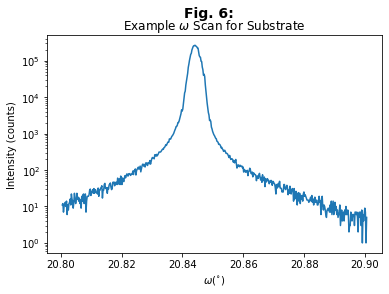

In [194]:
display(tag)
df_omega_sub = pd.read_table('https://raw.githubusercontent.com/josephmccourt2018/lab_jupyter_notebooks/master/example/461_test/PLD50nmFe2O3_Al2O3/HRXRD_Lab/W_Al2O3_006v2.ras',sep = '\s+',comment='*',names = ["2TH","Intensity", "attenuatation"],header = None)
plt.figure()
plt.suptitle('Fig. 6:', fontsize=14, fontweight='bold')
plt.title('Example $\omega$ Scan for Substrate')
plt.plot(df_omega_sub[df_omega_sub.columns[0]],df_omega_sub[df_omega_sub.columns[1]]*df_omega_sub[df_omega_sub.columns[2]])
plt.yscale('log')
plt.xlabel("$\omega$($^{\circ}$)")
plt.ylabel(df_omega_sub.columns[1]+" (counts)")
plt.show()


## _If you have time..._

If you complete this part of the lab with time to spare, you may wish to test your understanding of the experiment by looking at the second order Bragg peaks of your film and substrate (e.g. the (00(12)) peak of $\text{Fe}_2\text{O}_3$). Calculate where you would theoretically expect to find these peaks based on the crystal structure and perform the same experiment described above. It will be harder to see the second order film peak for $\text{Fe}_2\text{O}_3$ than $\text{Pt}$. Here is an example second order peak $2\theta\omega$ scan done for $\text{Fe}_2\text{O}_3$:

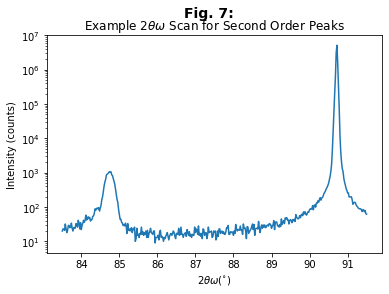

In [195]:
display(tag)
df_2tw_2 = pd.read_table('https://raw.githubusercontent.com/josephmccourt2018/lab_jupyter_notebooks/master/example/461_test/PLD50nmFe2O3_Al2O3/HRXRD_Lab/2thW_both_0012.ras',sep = '\s+',comment='*',names = ["2TH","Intensity", "attenuatation"],header = None)
plt.figure()
plt.suptitle('Fig. 7:', fontsize=14, fontweight='bold')
plt.title('Example $2\\theta\omega$ Scan for Second Order Peaks')
plt.plot(df_2tw_2[df_2tw_2.columns[0]],df_2tw_2[df_2tw_2.columns[1]]*df_2tw_2[df_2tw_2.columns[2]])
plt.yscale('log')
plt.xlabel("$2\\theta\omega$($^{\circ}$)")
plt.ylabel(df_2tw_2.columns[1]+" (counts)")
plt.show()

# 4. Finishing Measurement

Congratulations on performing an HRXRD experiment. It is now time to complete some final steps. Always leave the Smartlab in the same state as it was before you began your experiment (e.g. X-ray source turned off, software closed, etc.).

### Follow the instructions and put a check mark in each step as you advance.

The following experiment will be performed in the *Pro/Manual Control* window of Smartlab Studio 2 software.

In [196]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code


# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list_finish = ['Make sure the following motors are set to zero in the H/W Status Tab: $2\\theta$, $\omega$, $2\\theta\chi$, $\chi$, $\phi$, R$_x$, R$_y$. If not, open the tab for the specific motor in Pro/Manual Control, put zero and click on Move.',
            'Open XG Control.',
            'Turn Off the X-Ray by clicking the Off button. There is no need to set the voltage or current to any value.',
            'In the Data Browser Window, delete all your scans so next user can start with a clean workspace. Make sure you have all the necessary scans saved.']
checkbox_array_finish = []
for step in step_list_finish:
    step_index = str(step_list_finish.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_finish.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb5 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_finish:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_finish.index(checkbox)+1))
            pb5.button_style='danger'
    if steps_completed == len(checkbox_array_finish):
        print("You are all set!")
        print("Please let us know if anything can be improved.") 
        pb5.button_style='success'
        
pb5.on_click(on_button_clicked)
display(pb5)

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Make sure th…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Open XG Cont…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Turn Off the…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='In the Data …

Button(button_style='info', description='Finish!', style=ButtonStyle())

## Summary of the Labs So Far

**Lab 1 XRR**: Investigating the thickness, roughness, and electron densities of our film and substrate.

**Lab 2 HRXRD Specular**: Determining the out of plane lattice constant for the film and looking at the mosaicity of the film.

**_(Upcoming)_ Lab 3 HRXRD Off Specular**: We will determine the in plane order of of the film and figuring out whether or not the film is *textured* (textured implies there is no preferred in plane orientation of the film)

# Questions

- There is an example $2\theta$ flat top scan to determine the offset of the alignment. However, if we just move $2\theta$ to zero (which is within the flattop peak), would it make a difference to perform the scan at the true center of the flat top? I think we should talk about this a bit more as I feel I might be missing something.
- In the description part of the experiment, it mentions $2\theta\omega$ scans and a description. I think it would be wise for you to go through this and make sure this is talking about $2\theta\omega$ scans and NOT $\theta/2\theta$ scans. We should also mention why we are performing $2\theta\omega$ scans in this lab instead of $\theta/2\theta$ scans.
- Would you like to mention information about the miscut alignment that will be done beforehand? Or just not mention information regarding the miscut...
- Are we still having the students perform preliminary work done with crystal maker? 